In [1]:
### Data Manipulation 
import pandas as pd
import numpy as np

### Data Viz 
import matplotlib.pyplot as plt
import seaborn as sns

### NLP libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy

### transformers 
# !pip install transformers
from transformers import pipeline
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorWithPadding


### modeling and metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, f1_score, precision_score, recall_score, accuracy_score,precision_recall_fscore_support
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
pax = pd.read_csv("pax.csv", encoding='utf-8') 

/var/folders/g5/fgf96lvd7vl7r8rm0sqj1rhm0000gn/T/ipykernel_21894/2297266212.py:1: DtypeWarning: Columns (8,29,284,285,286,287,288,289,291,295,297,299,301,302,304,305,306) have mixed types. Specify dtype option on import or set low_memory=False.
  pax = pd.read_csv("pax.csv", encoding='utf-8')


In [3]:
pax["end"] = pax["ep_end"]

In [4]:
pax['ter'] = pax['Contp'].apply(lambda x: 1 if 'Territory' in str(x) and 'Government/territory' not in str(x) else 0)
pax['gov'] = pax['Contp'].apply(lambda x: 1 if 'Government' in str(x) and 'Government/territory' not in str(x) else 0)
pax['gov_ter'] = pax['Contp'].apply(lambda x: 1 if 'Government/territory' in str(x) else 0)
pax['inter_group'] = pax['Contp'].apply(lambda x: 1 if 'Inter-group' in str(x) else 0)
pax['other'] = pax.apply(lambda row: 1 if row[['ter', 'gov', 'gov_ter', 'inter_group']].sum() == 0 else 0, axis=1)
print(pax[['Contp', 'ter', 'gov', 'gov_ter', 'inter_group', 'other']].head())



print(pax['Status'].value_counts())
pax['sub_status'] = pax['Status'].apply(lambda x: 1 if x == 'Agreement with subsequent status' else 0)
pax['multiparty'] = pax['Status'].apply(lambda x: 1 if x == 'Multiparty signed/agreed' else 0)
pax['status_unclear'] = pax['Status'].apply(lambda x: 1 if x == 'Status unclear' else 0)
pax['uni_doc'] = pax['Status'].apply(lambda x: 1 if x == 'Unilateral document' else 0)
print(pax[['Status', 'sub_status', 'multiparty', 'status_unclear', 'uni_doc']].head())



print(pax['Agtp'].value_counts())
pax['inter'] = pax['Agtp'].apply(lambda x: 1 if x == 'Inter' else 0)
pax['inter_intra'] = pax['Agtp'].apply(lambda x: 1 if x == 'InterIntra' else 0)
pax['intra'] = pax['Agtp'].apply(lambda x: 1 if x == 'Intra' else 0)
pax['intra_local'] = pax['Agtp'].apply(lambda x: 1 if x == 'IntraLocal' else 0)
print(pax[['Agtp', 'inter', 'inter_intra', 'intra', 'intra_local']].head())


print(pax['Stage'].value_counts())
pax['stage_cea'] = pax['Stage'].apply(lambda x: 1 if x == 'Cea' else 0)
pax['stage_imp'] = pax['Stage'].apply(lambda x: 1 if x == 'Imp' else 0)
pax['stage_oth'] = pax['Stage'].apply(lambda x: 1 if x == 'Oth' else 0)
pax['stage_pre'] = pax['Stage'].apply(lambda x: 1 if x == 'Pre' else 0)
pax['stage_ren'] = pax['Stage'].apply(lambda x: 1 if x == 'Ren' else 0)
pax['stage_subcomp'] = pax['Stage'].apply(lambda x: 1 if x == 'SubComp' else 0)
pax['stage_subpar'] = pax['Stage'].apply(lambda x: 1 if x == 'SubPar' else 0)
print(pax[['Stage', 'stage_cea', 'stage_imp', 'stage_oth', 'stage_pre', 
           'stage_ren', 'stage_subcomp', 'stage_subpar']].head())



print(pax['StageSub'].value_counts())
pax['stagesub_ceamix'] = pax['StageSub'].apply(lambda x: 1 if x == 'CeaMix' else 0)
pax['stagesub_ceas'] = pax['StageSub'].apply(lambda x: 1 if x == 'Ceas' else 0)
pax['stagesub_conf'] = pax['StageSub'].apply(lambda x: 1 if x == 'Conf' else 0)
pax['stagesub_extpar'] = pax['StageSub'].apply(lambda x: 1 if x == 'ExtPar' else 0)
pax['stagesub_extsub'] = pax['StageSub'].apply(lambda x: 1 if x == 'ExtSub' else 0)
pax['stagesub_frag'] = pax['StageSub'].apply(lambda x: 1 if x == 'FrAg' else 0)
pax['stagesub_frcons'] = pax['StageSub'].apply(lambda x: 1 if x == 'FrCons' else 0)
pax['stagesub_frparoth'] = pax['StageSub'].apply(lambda x: 1 if x == 'FrparOth' else 0)
pax['stagesub_impmod'] = pax['StageSub'].apply(lambda x: 1 if x == 'ImpMod' else 0)
pax['stagesub_impoth'] = pax['StageSub'].apply(lambda x: 1 if x == 'ImpOth' else 0)
pax['stagesub_iss'] = pax['StageSub'].apply(lambda x: 1 if x == 'Iss' else 0)
pax['stagesub_multiss'] = pax['StageSub'].apply(lambda x: 1 if x == 'MultIss' else 0)
pax['stagesub_premix'] = pax['StageSub'].apply(lambda x: 1 if x == 'PreMix' else 0)
pax['stagesub_preoth'] = pax['StageSub'].apply(lambda x: 1 if x == 'PreOth' else 0)
pax['stagesub_prin'] = pax['StageSub'].apply(lambda x: 1 if x == 'Prin' else 0)
pax['stagesub_proc'] = pax['StageSub'].apply(lambda x: 1 if x == 'Proc' else 0)
pax['stagesub_reimp'] = pax['StageSub'].apply(lambda x: 1 if x == 'Reimp' else 0)
pax['stagesub_rel'] = pax['StageSub'].apply(lambda x: 1 if x == 'Rel' else 0)
pax['stagesub_reoth'] = pax['StageSub'].apply(lambda x: 1 if x == 'Reoth' else 0)
pax['stagesub_repre'] = pax['StageSub'].apply(lambda x: 1 if x == 'Repre' else 0)
pax['stagesub_resub'] = pax['StageSub'].apply(lambda x: 1 if x == 'Resub' else 0)
print(pax[['StageSub', 'stagesub_ceamix', 'stagesub_ceas', 'stagesub_conf', 
           'stagesub_extpar', 'stagesub_extsub', 'stagesub_frag', 
           'stagesub_frcons', 'stagesub_frparoth', 'stagesub_impmod', 
           'stagesub_impoth', 'stagesub_iss', 'stagesub_multiss', 
           'stagesub_premix', 'stagesub_preoth', 'stagesub_prin', 
           'stagesub_proc', 'stagesub_reimp', 'stagesub_rel', 
           'stagesub_reoth', 'stagesub_repre', 'stagesub_resub']].head())


pax.loc[(pax['Stage'].isin(['Imp'])),'end'] = 1


pax['interim_b'] = pax['Interim'].apply(lambda x: 1 if x == 'Yes' else 0)
print(pax[['Interim', 'interim_b']].head())


pax[["Polps", "Terps", "Eps", "Mps"]] = pax[["Polps", "Terps", "Eps", "Mps"]].applymap(lambda x: 1 if x > 0 else 0)
pax["ps"] = pax[["Polps", "Terps", "Eps", "Mps"]].max(axis=1)


### List of columns to modify
columns_to_modify = [
    "GRa", "GRe", "GRef", "Pol", "Ele", "HrDem", "Prot", "Dev", 
    "Ce", "SsrPol", "SsrArm", "SsrDdr", 
    "TjAm", "TjPrire", "TjRep", "TjNR"
]

### Convert values to 0 or 1 based on the condition
for column in columns_to_modify:
    pax[column] = pax[column].apply(lambda x: 0 if x == 0 else 1)
    
    
features = [
    "ter", "gov", "inter", "inter_intra", "intra",
    "stage_cea", "stage_pre", "stage_ren", "stage_subcomp", "stage_subpar",
    "GRa", "GRe", "GRef", "GeWom", "Pol", "Ele", "ConGen","ps","HrCp", 
    "HrDem", "Prot","JusCr", "JusJu", "Dev", "IntFu", "SsrGua", "Ce", "SsrPol",
    "SsrArm", "SsrDdr", "SsrPsf", "SsrFf", "TjAm", "TjPrire", "TjRep",
    "TjNR", "ImUN", "ImPK", "ImE"
]

target = pax["end"]






### Combine features and target into single list for checking missing values
columns_to_check = features + ["end"]

### Count number of missing values in each column
missing_values = pax[columns_to_check].isnull().sum()

### Display results
print("Number of missing values for each column:")
print(missing_values)



pax_clean= pax.dropna(subset=columns_to_check)

        Contp  ter  gov  gov_ter  inter_group  other
0  Government    0    1        0            0      0
1  Government    0    1        0            0      0
2  Government    0    1        0            0      0
3  Government    0    1        0            0      0
4  Government    0    1        0            0      0
Status
Multiparty signed/agreed            1900
Unilateral document                  135
Status unclear                        12
Agreement with subsequent status       8
Name: count, dtype: int64
                     Status  sub_status  multiparty  status_unclear  uni_doc
0  Multiparty signed/agreed           0           1               0        0
1  Multiparty signed/agreed           0           1               0        0
2  Multiparty signed/agreed           0           1               0        0
3  Multiparty signed/agreed           0           1               0        0
4  Multiparty signed/agreed           0           1               0        0
Agtp
Intra         1368

## BERT

In [9]:
### preprocess dataset
pax_clean['text'] = pax_clean['text'].fillna('')  ### Replace NaN with empty strings
pax_clean['end'] = pax_clean['end'].map({1: 1, 0: 0})  ### Ensure binary labels

### Split dataset into train and test
train_data, test_data = train_test_split(pax_clean, test_size=0.2, random_state=42, stratify=pax_clean['end'])

### Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_data[['text', 'end']])
test_dataset = Dataset.from_pandas(test_data[['text', 'end']])

### Tokenization
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=512)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

### Remove unnecessary columns
train_dataset = train_dataset.remove_columns(["text"])
test_dataset = test_dataset.remove_columns(["text"])

### Rename label column
train_dataset = train_dataset.rename_column("end", "labels")
test_dataset = test_dataset.rename_column("end", "labels")

### Set format for PyTorch
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

### Load Pretrained Model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

### Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

### Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=6,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

### Data Collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

### Train model
trainer.train()

### Evaluate model
results = trainer.evaluate()

### Extract evaluation metrics
accuracy = results["eval_accuracy"]
precision = results["eval_precision"]
recall = results["eval_recall"]
f1 = results["eval_f1"]

### Print evaluation results
print("\nEvaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

### Save model
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")

Map:   0%|          | 0/1206 [00:00<?, ? examples/s]

Map:   0%|          | 0/302 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.553500,0.582362,0.682119,0.478261,0.647059,0.379310
2,0.529800,0.558302,0.695364,0.654135,0.580000,0.750000
3,0.422400,0.533090,0.725166,0.669323,0.622222,0.724138
4,0.337100,0.539832,0.721854,0.644068,0.633333,0.655172
5,0.162900,0.604800,0.764901,0.672811,0.722772,0.629310
6,0.188300,0.609075,0.761589,0.678571,0.703704,0.655172



Evaluation Results:
Accuracy: 0.7649
Precision: 0.7228
Recall: 0.6293
F1 Score: 0.6728


('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json',
 './saved_model/tokenizer.json')

In [12]:
### Get predictions on the test set
logits = trainer.predict(test_dataset).predictions
predictions = np.argmax(logits, axis=1)
true_labels = np.array(test_dataset["labels"])

### Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

### Analyze false positives and false negatives
false_positives = test_dataset.select([i for i, (p, t) in enumerate(zip(predictions, true_labels)) if p == 1 and t == 0])
false_negatives = test_dataset.select([i for i, (p, t) in enumerate(zip(predictions, true_labels)) if p == 0 and t == 1])

### Print few examples of misclassified agreements
print("\nFalse Positives (Predicted Success but Failed):")
for i, example in enumerate(false_positives["input_ids"][:5]):
    print(f"{i + 1}: {tokenizer.decode(example, skip_special_tokens=True)}")

print("\nFalse Negatives (Predicted Failure but Successful):")
for i, example in enumerate(false_negatives["input_ids"][:5]):
    print(f"{i + 1}: {tokenizer.decode(example, skip_special_tokens=True)}")


False Positives (Predicted Success but Failed):
1: contact group statement - rome, 29 april 1998 1. the contact group met in rome on april 29 to decide on next steps regarding the increasingly dangerous situation in kosovo, taking into account the report of the osce troika on developments since the bonn contact group ministerial. they considered the report an important and balanced contribution to the assessment of the situation. the contact group believes that the current situation is untenable. the risk of an escalating conflict requires immediate action. 2. all members of the contact group are firmly opposed to independence for kosovo and to a continuation of the unacceptable status quo. immediate steps by the parties to reduce tension and to begin an unconditional dialogue are indispensable, and the only way to reverse the deterioration in the situation and bring about a political solution. 3. the contact group condemns the increase in violence in recent days in kosovo, in particu

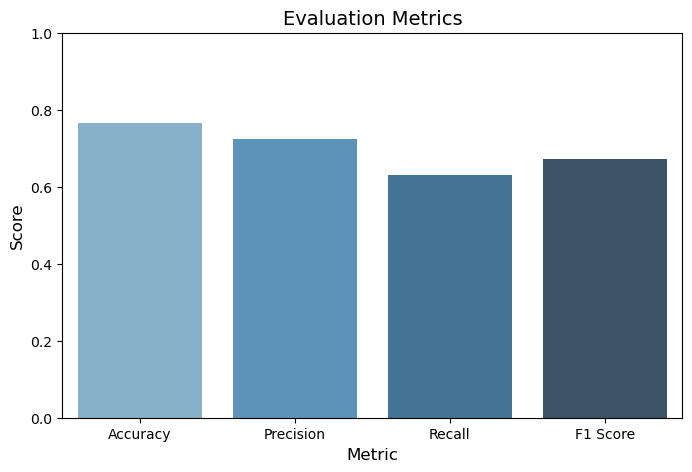

In [13]:

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
plt.title("Evaluation Metrics", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.ylim(0, 1)
plt.show()

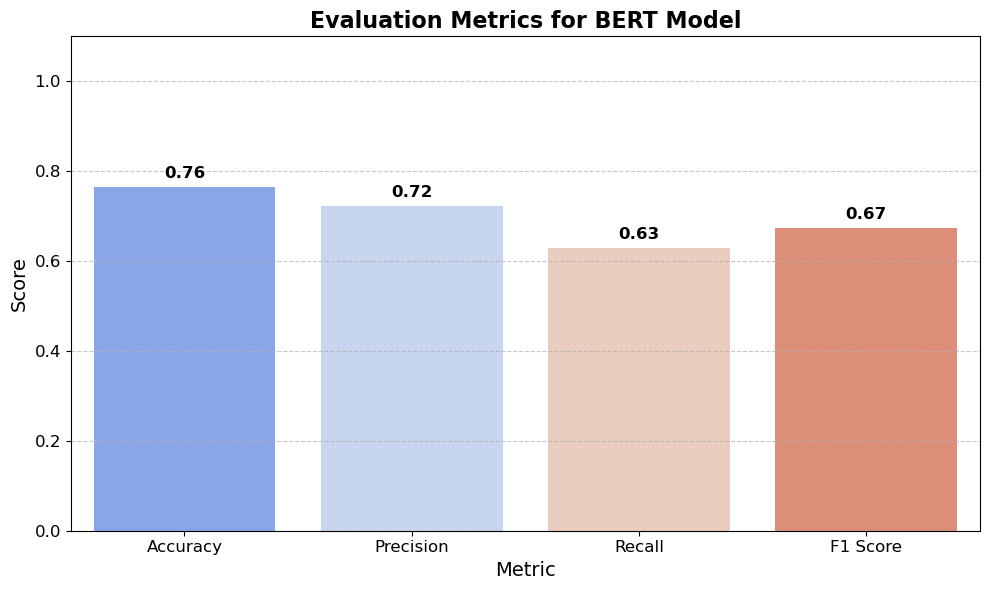

In [17]:
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="coolwarm")

for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.title("Evaluation Metrics for BERT Model", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.ylim(0, 1.1)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Error initializing tokenizer: Converting from Tiktoken failed, if a converter for SentencePiece is available, provide a model path with a SentencePiece tokenizer.model file.Currently available slow->fast convertors: ['AlbertTokenizer', 'BartTokenizer', 'BarthezTokenizer', 'BertTokenizer', 'BigBirdTokenizer', 'BlenderbotTokenizer', 'CamembertTokenizer', 'CLIPTokenizer', 'CodeGenTokenizer', 'ConvBertTokenizer', 'DebertaTokenizer', 'DebertaV2Tokenizer', 'DistilBertTokenizer', 'DPRReaderTokenizer', 'DPRQuestionEncoderTokenizer', 'DPRContextEncoderTokenizer', 'ElectraTokenizer', 'FNetTokenizer', 'FunnelTokenizer', 'GPT2Tokenizer', 'HerbertTokenizer', 'LayoutLMTokenizer', 'LayoutLMv2Tokenizer', 'LayoutLMv3Tokenizer', 'LayoutXLMTokenizer', 'LongformerTokenizer', 'LEDTokenizer', 'LxmertTokenizer', 'MarkupLMTokenizer', 'MBartTokenizer', 'MBart50Tokenizer', 'MPNetTokenizer', 'MobileBertTokenizer', 'MvpTokenizer', 'NllbTokenizer', 'OpenAIGPTTokenizer', 'PegasusTokenizer', 'Qwen2Tokenizer', 'Realm

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/1206 [00:00<?, ? examples/s]

Map:   0%|          | 0/302 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.544800,0.696663,0.662252,0.888889,0.137931,0.238806
2,0.455000,0.563769,0.692053,0.566474,0.844828,0.678201
3,0.371300,0.593803,0.778146,0.696000,0.750000,0.721992
4,0.136400,0.789858,0.788079,0.724138,0.724138,0.724138



Evaluation Results:
Accuracy: 0.7881
Precision: 0.7241
Recall: 0.7241
F1 Score: 0.7241


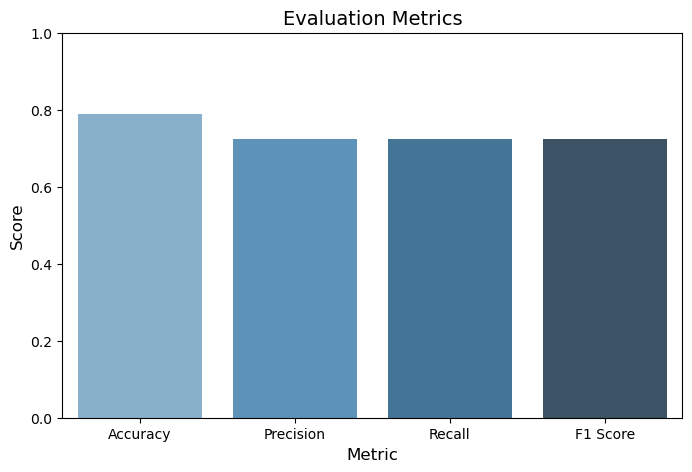

In [19]:
pax_clean['text'] = pax_clean['text'].fillna('')  ### Replace NaN with empty strings
pax_clean['end'] = pax_clean['end'].map({1: 1, 0: 0})  ### Ensure binary labels
train_data, test_data = train_test_split(pax_clean, test_size=0.2, random_state=42, stratify=pax_clean['end'])

train_dataset = Dataset.from_pandas(train_data[['text', 'end']])
test_dataset = Dataset.from_pandas(test_data[['text', 'end']])

model_name = "microsoft/deberta-v3-large"

try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
except ValueError as e:
    print(f"Error initializing tokenizer: {e}")
    print("Switching to fallback model: roberta-large")
    model_name = "roberta-large"
    tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=512)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

### Remove unnecessary columns
train_dataset = train_dataset.remove_columns(["text"])
test_dataset = test_dataset.remove_columns(["text"])

### Rename label column
train_dataset = train_dataset.rename_column("end", "labels")
test_dataset = test_dataset.rename_column("end", "labels")

### Set format for PyTorch
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

### Load Pretrained Model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

### Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

### Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

### Data Collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


trainer.train()
results = trainer.evaluate()
accuracy = results["eval_accuracy"]
precision = results["eval_precision"]
recall = results["eval_recall"]
f1 = results["eval_f1"]

print("\nEvaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}


plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
plt.title("Evaluation Metrics", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.ylim(0, 1)
plt.show()

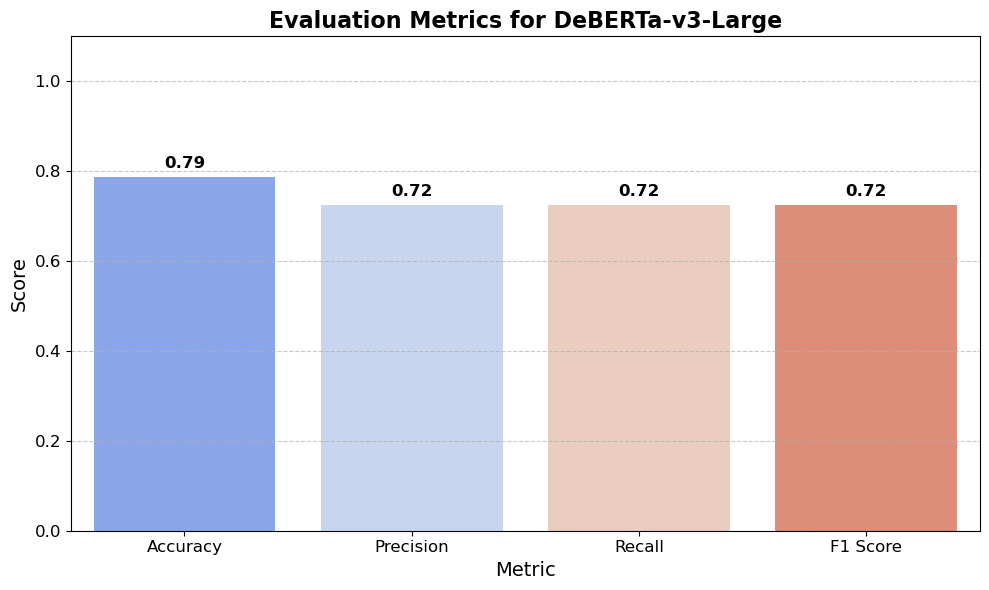

In [22]:
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="coolwarm")

for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.title("Evaluation Metrics for DeBERTa-v3-Large", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.ylim(0, 1.1) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

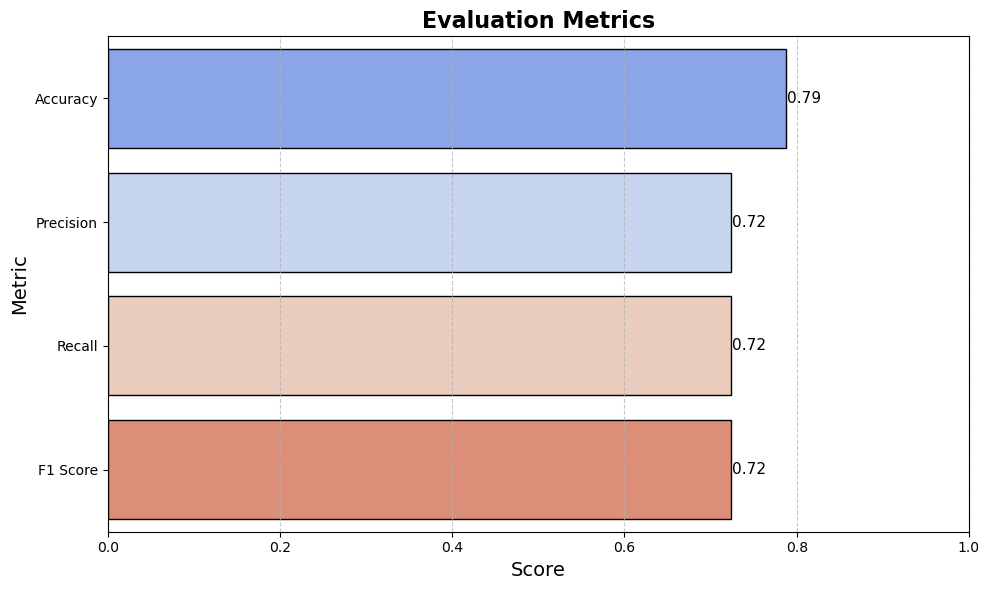

In [21]:
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Score"])

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Score",
    y="Metric",
    data=metrics_df,
    palette="coolwarm",
    edgecolor="black"
)

for index, value in enumerate(metrics_df["Score"]):
    plt.text(
        value + 0.02,  # Adjust for slight gap
        index, 
        f"{value:.2f}", 
        color="black", 
        ha="center", 
        va="center", 
        fontsize=11
    )

plt.title("Evaluation Metrics", fontsize=16, fontweight="bold")
plt.xlabel("Score", fontsize=14)
plt.ylabel("Metric", fontsize=14)
plt.xlim(0, 1)  # Set limit for score range
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()